In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 8]

# Define function and partial derivatives (calculated numerically)
def f(x1, x2):
    return x1**2 + x2**2

def fx1(x1, x2):
    delta = 1e-5
    return (f(x1+delta, x2) - f(x1, x2))/delta

def fx2(x1, x2):
    delta = 1e-5
    return (f(x1, x2+delta) - f(x1, x2))/delta

<IPython.core.display.Javascript object>


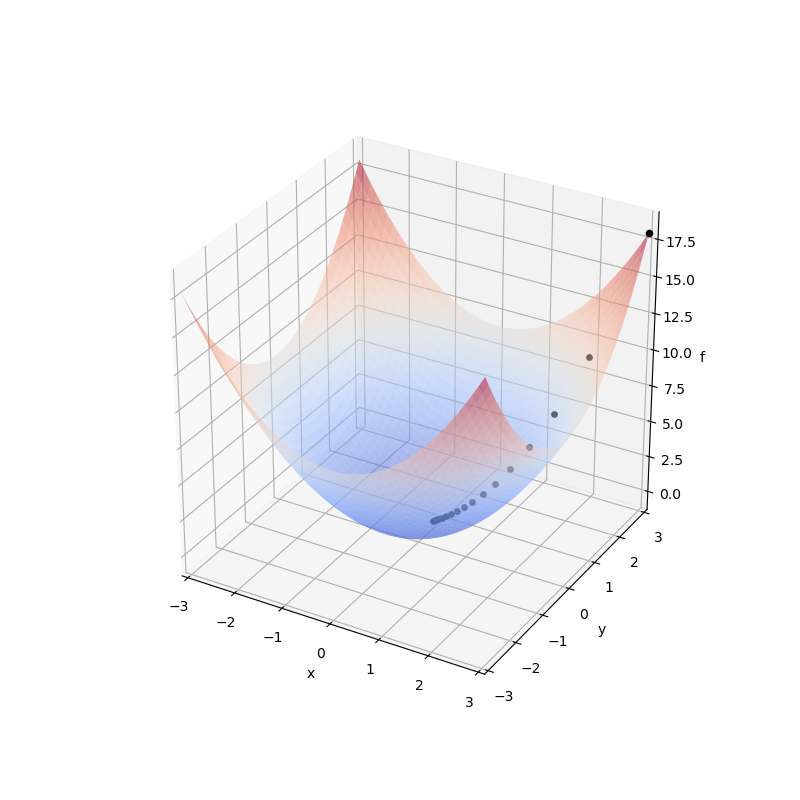

Text(0.5, 0, 'f')

In [2]:
# Plot actual surface
fig = plt.figure()
ax = fig.gca(projection='3d')

X1, X2 = np.meshgrid(np.linspace(-3, 3), np.linspace(-3, 3))
F = X1**2 + X2**2
ax.plot_surface(X1, X2, F, alpha=0.5, cmap=cm.coolwarm, zorder=0)

# Define starting point
x = 3.0
y = 3.0
z = f(x, y)
ax.scatter(x, y, z, color='k', s=20)

# Gradient Decent until error is under a threshold
learning_rate = 0.75
running_dxdf = 0
running_dydf = 0
error = 1
error_threshold = 0.1
while error > error_threshold:
    running_dxdf += fx1(x, y)**2
    running_dydf += fx2(x, y)**2
    x  = x - (learning_rate/np.sqrt(running_dxdf))*fx1(x, y)
    y  = y - (learning_rate/np.sqrt(running_dydf))*fx2(x, y)
    ax.scatter(x, y, f(x, y), color='k', s=15, zorder=1)
    error = f(x, y) # This function's min is zero so this is the error

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')